In [20]:
import pandas as pd
import numpy as np
data = pd.read_csv(r'C:\Users\Ahmed Rehman\Downloads\Sleep_health_and_lifestyle_dataset.csv')

In [21]:
data.head(2)

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,NaN
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN


In [22]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Person ID                374 non-null    int64  
 1   Gender                   374 non-null    object 
 2   Age                      374 non-null    int64  
 3   Occupation               374 non-null    object 
 4   Sleep Duration           374 non-null    float64
 5   Quality of Sleep         374 non-null    int64  
 6   Physical Activity Level  374 non-null    int64  
 7   Stress Level             374 non-null    int64  
 8   BMI Category             374 non-null    object 
 9   Blood Pressure           374 non-null    object 
 10  Heart Rate               374 non-null    int64  
 11  Daily Steps              374 non-null    int64  
 12  Sleep Disorder           155 non-null    object 
dtypes: float64(1), int64(7), object(5)
memory usage: 38.1+ KB


In [23]:
data.describe()

,Person ID,Age,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,Heart Rate,Daily Steps
count,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000
mean,187.500000,42.184492,7.132086,7.312834,59.171123,5.385027,70.165775,6816.844920
std,108.108742,8.673133,0.795657,1.196956,20.830804,1.774526,4.135676,1617.915679
min,1.000000,27.000000,5.800000,4.000000,30.000000,3.000000,65.000000,3000.000000
25%,94.250000,35.250000,6.400000,6.000000,45.000000,4.000000,68.000000,5600.000000
50%,187.500000,43.000000,7.200000,7.000000,60.000000,5.000000,70.000000,7000.000000
75%,280.750000,50.000000,7.800000,8.000000,75.000000,7.000000,72.000000,8000.000000
max,374.000000,59.000000,8.500000,9.000000,90.000000,8.000000,86.000000,10000.000000


In [24]:
data['Heart Rate'].describe()

count    374.000000
mean      70.165775
std        4.135676
min       65.000000
25%       68.000000
50%       70.000000
75%       72.000000
max       86.000000
Name: Heart Rate, dtype: float64

In [25]:
data['Heart Rate'].value_counts()

Heart Rate
68    94
70    76
72    69
65    67
75    36
78     5
85     3
80     3
84     2
83     2
73     2
67     2
74     2
77     2
81     2
76     2
69     2
86     2
82     1
Name: count, dtype: int64

In [27]:
data1 = data[data['Heart Rate'] >= 35]

In [32]:
avg = data[data1['BMI Category'] == 'Normal']
print('mean Sleep Quaility of a person with a noraml BMI is:', round(avg['Quality of Sleep'].mean(), 1))
print('median Sleep Quaility of a person with a noraml BMI is:', round(avg['Quality of Sleep'].median(), 1))

mean Sleep Quaility of a person with a noraml BMI is: 7.7
median Sleep Quaility of a person with a noraml BMI is: 8.0


In [34]:
male = data[data['Gender'] == 'Male']
print('Average Male Stress Level is', round(male['Stress Level'].mean(), 0))

Average Male Stress Level is 6.0


In [39]:
print('The number of Males Stress Level with a stress level higher than 3 is:', male[male['Stress Level'] > 3]['Stress Level'].count())

The number of Males Stress Level with a stress level higher than 3 is: 185


In [50]:
result = data.groupby(['Gender','BMI Category']).count()
result

Person ID  Age  Occupation  Sleep Duration  \
Gender BMI Category                                                
Female Normal                64   64          64              64   
       Normal Weight         14   14          14              14   
       Obese                  1    1           1               1   
       Overweight           106  106         106             106   
Male   Normal               131  131         131             131   
       Normal Weight          7    7           7               7   
       Obese                  9    9           9               9   
       Overweight            42   42          42              42   

                      Quality of Sleep  Physical Activity Level  Stress Level  \
Gender BMI Category                                                             
Female Normal                       64                       64            64   
       Normal Weight                14                       14            14   
       Obese                         1                        1             1   
       Overweight                  106                      106           106   
Male   Normal                      131                      131           131   
       Normal Weight                 7                        7             7   
       Obese                         9                        9             9   
       Overweight                   42                       42            42   

                      Blood Pressure  Heart Rate  Daily Steps  Sleep Disorder  
Gender BMI Category                                                            
Female Normal                     64          64           64               3  
       Normal Weight              14          14           14               4  
       Obese                       1           1            1               1  
       Overweight                106         106          106              95  
Male   Normal                    131         131          131               9  
       Normal Weight               7           7            7               0  
       Obese                       9           9            9               9  
       Overweight                 42          42           42              34

Using the Agg Function in Pandas

In [51]:
data.groupby(['Gender']).agg(
    {
        'Sleep Duration':['mean', 'median'],
        'Quality of Sleep':['mean', 'median'],
        'Physical Activity Level':['mean', 'median'],
    })

Sleep Duration        Quality of Sleep        Physical Activity Level  \
                 mean median             mean median                    mean   
Gender                                                                         
Female       7.229730    7.2         7.664865    8.0               59.140541   
Male         7.036508    7.2         6.968254    7.0               59.201058   

               
       median  
Gender         
Female   60.0  
Male     60.0

In [55]:
data.groupby(['Sleep Disorder']).agg({
    'Age':['count', 'median'],
    'Stress Level':['count', 'median'],
    'Sleep Duration':['count', 'median'],
})

Age        Stress Level        Sleep Duration       
               count median        count median          count median
Sleep Disorder                                                       
Insomnia          77   44.0           77    7.0             77    6.5
Sleep Apnea       78   50.0           78    7.0             78    6.8

In [61]:
data.groupby(['Gender','BMI Category']).agg({
    
    'Sleep Duration':['mean','median'],
    'Quality of Sleep':['mean','median'],
    'Stress Level':['mean','median'],
})

Sleep Duration        Quality of Sleep         \
                               mean median             mean median   
Gender BMI Category                                                  
Female Normal              7.793750   7.75         8.500000    8.5   
       Normal Weight       7.285714   7.20         7.285714    8.0   
       Obese               7.400000   7.40         7.000000    7.0   
       Overweight          6.880189   6.60         7.216981    7.0   
Male   Normal              7.198473   7.50         7.251908    8.0   
       Normal Weight       7.428571   7.50         7.714286    8.0   
       Obese               6.911111   7.30         6.333333    7.0   
       Overweight          6.492857   6.50         6.095238    6.0   

                     Stress Level         
                             mean median  
Gender BMI Category                       
Female Normal            3.500000    3.5  
       Normal Weight     5.142857    6.0  
       Obese             5.000000    5.0  
       Overweight        5.320755    4.0  
Male   Normal            5.923664    5.0  
       Normal Weight     5.285714    5.0  
       Obese             5.777778    5.0  
       Overweight        6.761905    7.0

Time to make Graphs and Charts

In [62]:
import matplotlib.pyplot as plt
import seaborn as sns

In [68]:
data.size

4862

In [69]:
data.shape

(374, 13)

In [70]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Person ID                374 non-null    int64  
 1   Gender                   374 non-null    object 
 2   Age                      374 non-null    int64  
 3   Occupation               374 non-null    object 
 4   Sleep Duration           374 non-null    float64
 5   Quality of Sleep         374 non-null    int64  
 6   Physical Activity Level  374 non-null    int64  
 7   Stress Level             374 non-null    int64  
 8   BMI Category             374 non-null    object 
 9   Blood Pressure           374 non-null    object 
 10  Heart Rate               374 non-null    int64  
 11  Daily Steps              374 non-null    int64  
 12  Sleep Disorder           155 non-null    object 
dtypes: float64(1), int64(7), object(5)
memory usage: 38.1+ KB


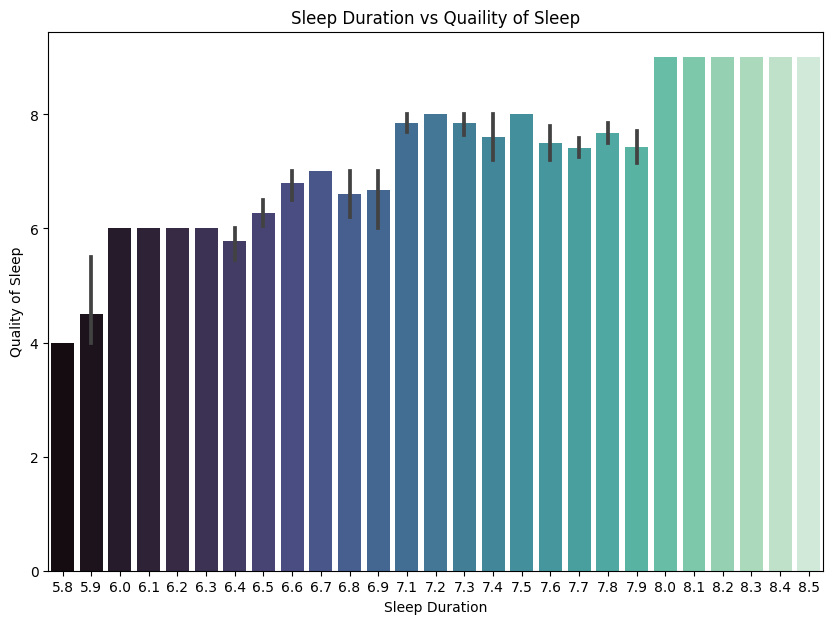

In [90]:
plt.figure(figsize=(10,7))
sns.barplot(x=data['Sleep Duration'], y=data['Quality of Sleep'], palette=('mako'))
plt.title('Sleep Duration vs Quaility of Sleep')
plt.show()

<AxesSubplot: xlabel='Daily Steps', ylabel='Count'>

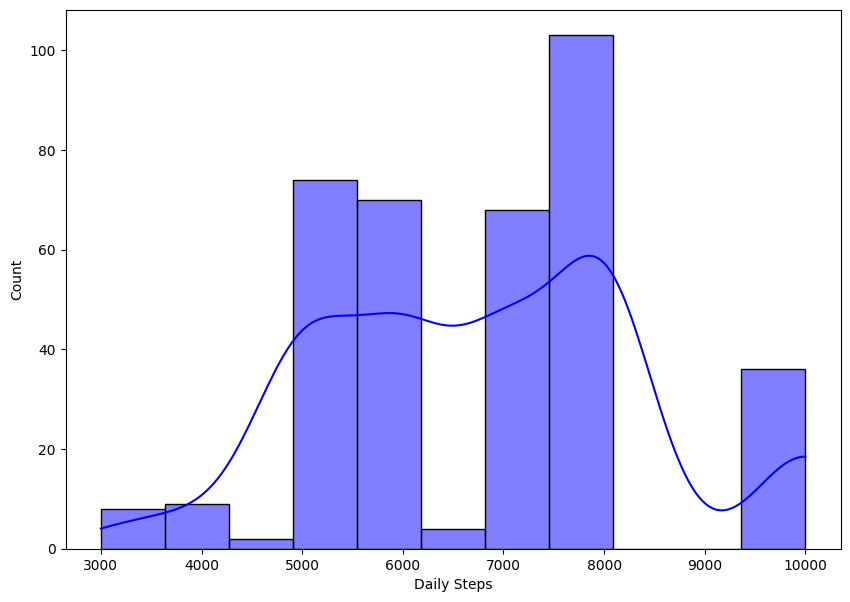

In [114]:
plt.figure(figsize=(10,7))
sns.histplot(data['Daily Steps'], kde=True, color=('blue'))

<AxesSubplot: xlabel='Stress Level', ylabel='Count'>

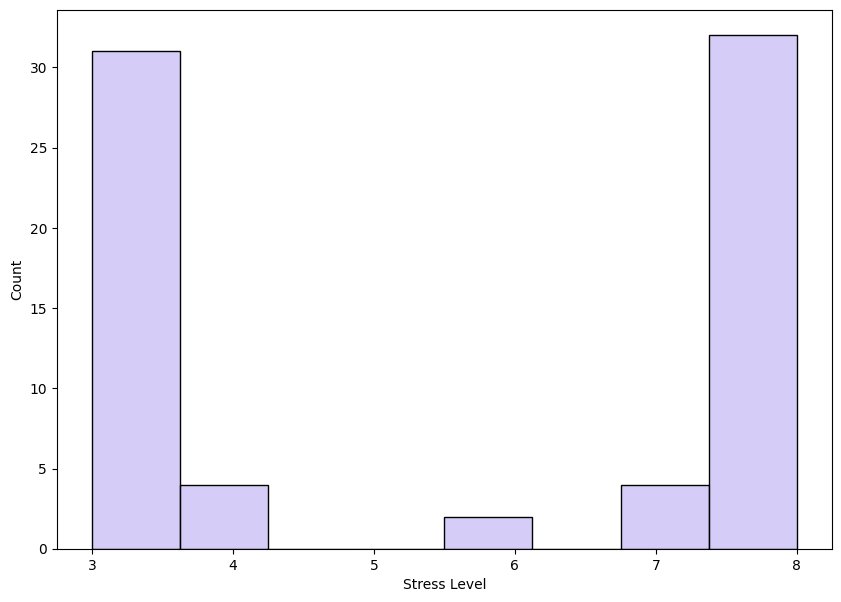

In [117]:
nurse = data[data['Occupation'] == 'Nurse']

plt.figure(figsize=(10,7))
sns.histplot(data=nurse['Stress Level'], color='#c8bbf5')

<AxesSubplot: xlabel='Stress Level', ylabel='Count'>

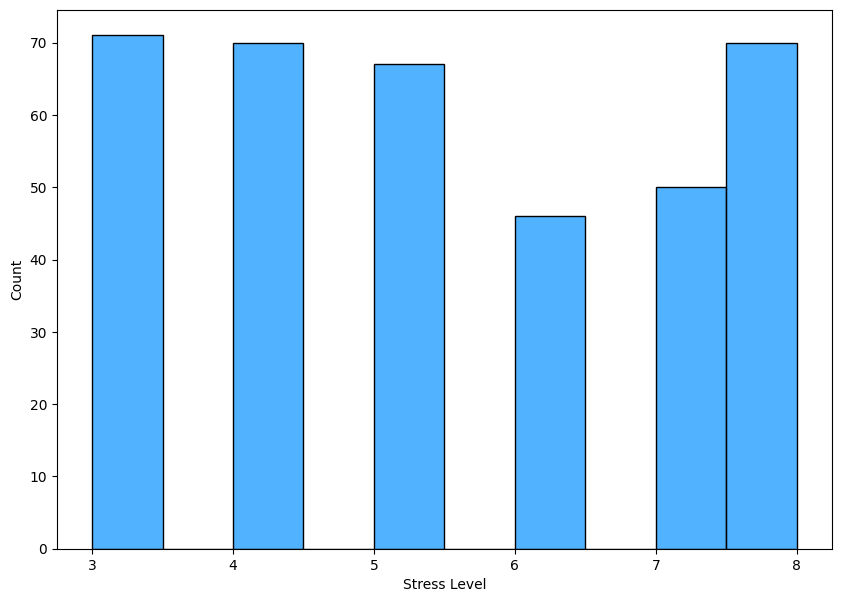

In [119]:
plt.figure(figsize=(10,7))
sns.histplot(data=data['Stress Level'], color='#1798ff')

<AxesSubplot: xlabel='Sleep Disorder', ylabel='Count'>

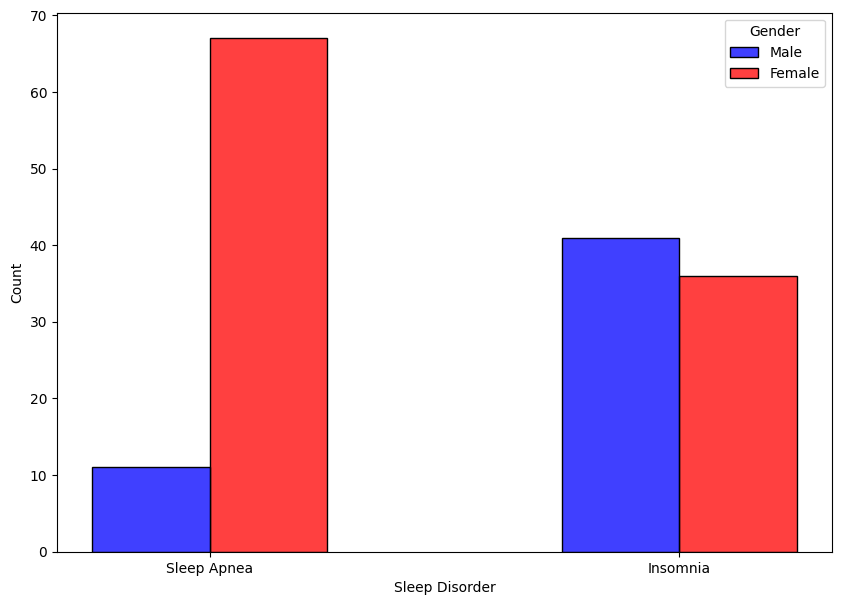

In [134]:
plt.figure(figsize=(10,7))
sns.histplot(data=data, x='Sleep Disorder', hue='Gender', multiple='dodge', shrink=.5, palette={'Male':'blue', 'Female':'red'})

([<matplotlib.patches.Wedge at 0x1e117aef3d0>,
 [Text(-0.06377235477864826, 1.098149847136531, 'Male'),
  Text(0.0637722519624387, -1.098149853107325, 'Female')])

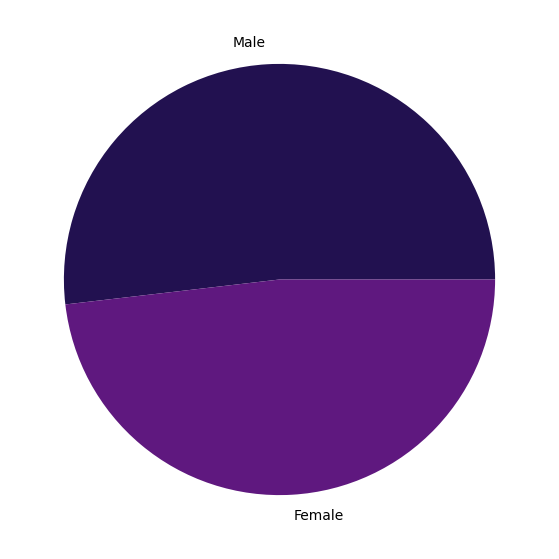

In [150]:
fig = plt.figure(figsize=(10,7))
plt.pie(data.groupby('Gender')['Quality of Sleep'].sum(), labels=['Male', 'Female'])

Trouble in Changing Colors

Text(0.5, 1.0, 'Daily Steps vs Heart Rate')

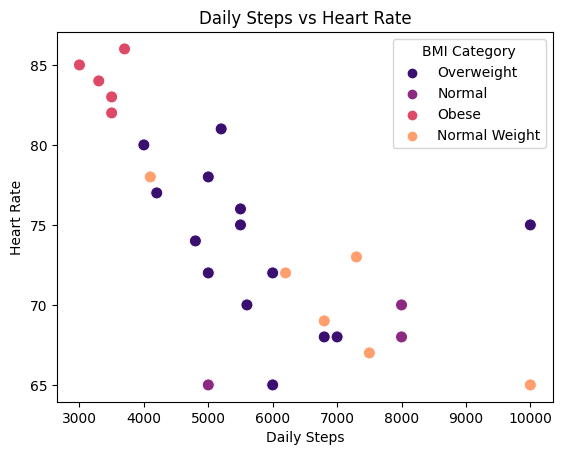

In [159]:
sns.scatterplot(x=data['Daily Steps'], y=data['Heart Rate'], hue=data['BMI Category'], s=75, palette=('magma'))
plt.title('Daily Steps vs Heart Rate')

Statsical Modeling

In [3]:
!pip install scipy

     ---------------------------------------- 0.0/44.0 MB ? eta -:--:--
     ---------------------------------------- 0.1/44.0 MB 4.3 MB/s eta 0:00:11
     ---------------------------------------- 0.5/44.0 MB 5.6 MB/s eta 0:00:08
     - -------------------------------------- 1.1/44.0 MB 9.1 MB/s eta 0:00:05
     - -------------------------------------- 1.8/44.0 MB 10.5 MB/s eta 0:00:05
     -- ------------------------------------- 2.4/44.0 MB 11.1 MB/s eta 0:00:04
     -- ------------------------------------- 3.1/44.0 MB 11.8 MB/s eta 0:00:04
     --- ------------------------------------ 3.8/44.0 MB 12.1 MB/s eta 0:00:04
     ---- ----------------------------------- 4.5/44.0 MB 12.6 MB/s eta 0:00:04
     ---- ----------------------------------- 5.2/44.0 MB 12.7 MB/s eta 0:00:04
     ----- ---------------------------------- 5.8/44.0 MB 12.9 MB/s eta 0:00:03
     ----- ---------------------------------- 6.5/44.0 MB 13.0 MB/s eta 0:00:03
     ------ --------------------------------- 7.2/4


[notice] A new release of pip is available: 23.0 -> 23.2.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [4]:
import scipy as scip
from scipy import stats

In [8]:
import pandas as pd
import numpy as np
data = pd.read_csv(r'C:\Users\Ahmed Rehman\Downloads\Sleep_health_and_lifestyle_dataset.csv')

In [10]:
data.isnull().sum()

Person ID                    0
Gender                       0
Age                          0
Occupation                   0
Sleep Duration               0
Quality of Sleep             0
Physical Activity Level      0
Stress Level                 0
BMI Category                 0
Blood Pressure               0
Heart Rate                   0
Daily Steps                  0
Sleep Disorder             219
dtype: int64